In [1]:
from itertools import accumulate
import matplotlib.pyplot as plt
from math import inf,log,sqrt
from scipy.stats import norm
from statistics import mean,variance

In [2]:
class sumstats :
    def __init__(self,X) :
        self.X = X
        self.SX = [0] + list(accumulate(X))
        self.SXX = [0] + list(accumulate([x*x for x in X]))

In [44]:
class normal_mean :
    def __init__(self,X) :
        self.sumstats = sumstats(X)
    def __call__(self,i,j) :
        val = self.sumstats.SX[j+1] - self.sumstats.SX[i]
        val *= val
        val /= (j - i + 1)
        val = -val
        val += self.sumstats.SXX[j+1] - self.sumstats.SXX[i]
        return val

In [4]:
class functor :
    def __init__(self) :
        self.D = {}
    def add(self,x,y) :
        self.D[x] = y
    def __call__(self,*x) :
        return self.D[x]

In [208]:
def amoc(f,g,a,b,beta,threshold) :
    cost = [threshold] + [f(a,i) + g(i+1,b) + beta for i in range(a,b)]
    min_cost = min(cost)
    loc = cost.index(min_cost)
    return (min_cost,loc + a)

In [203]:
def op(X,cost,beta) :
    G = cost(X)
    F = functor()
    locations = []
    R = [0]
    for i in range(len(X)) :
        min_cost,loc = amoc(F,G,0,i,beta,G(0,i))
        F.add((0,i),min_cost)
        locations.append(loc)
    for i in range(len(locations)) :
        locations[i] = i - locations[i]
    return locations

In [171]:
def changepoints(locations) :
    cpts = [len(locations) - 1]
    while cpts[0] - locations[cpts[0]] - 1 > 0 :
        cpts.insert(0,cpts[0] - locations[cpts[0]] - 1)
    return cpts[:-1]

In [204]:
import csv
file = open("X.csv", "r")
X = list(csv.reader(file, delimiter=","))
X = [float(item) for sublist in X for item in sublist]
file.close()
print(mean(X),sqrt(variance(X)))

-3.9863529867114243e-17 1.0


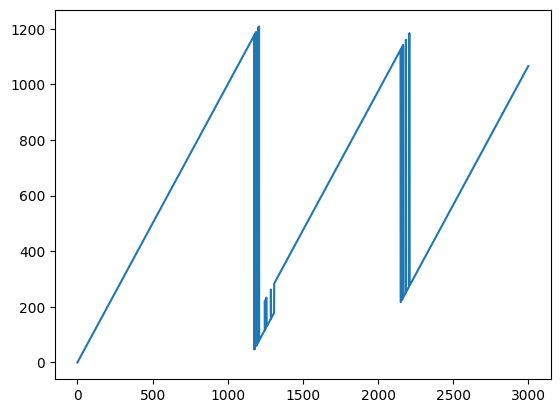

In [209]:
beta = 2*log(len(X))
locs = op(X,normal_mean,beta)
plt.plot(locs)

In [210]:
changepoints(locs)

[1024, 1932]

In [216]:

class pelt_functor :
    def __init__(self) :
        self.D = {}
    def add(self,x,y) :
        _,b = x
        self.D[b] = y
    def __call__(self,*x) :
        _,b = x
        return self.D[b]

def pelt(X,cost,beta) :
    G = cost(X)
    F = pelt_functor()
    locations = []
    left = 0
    for i in range(len(X)) :
        min_cost,loc = amoc(F,G,left,i,beta,G(0,i))
        F.add((left,i),min_cost)
        locations.append(loc)
        # prune
        pruned = [j for j in range(left,i) if F(left,j) + G(j+1,i) > F(left,i)] 
        if pruned != [] :
            left = pruned[-1]
    for i in range(len(locations)) :
        locations[i] = i - locations[i]
    return locations

[1024, 1932]

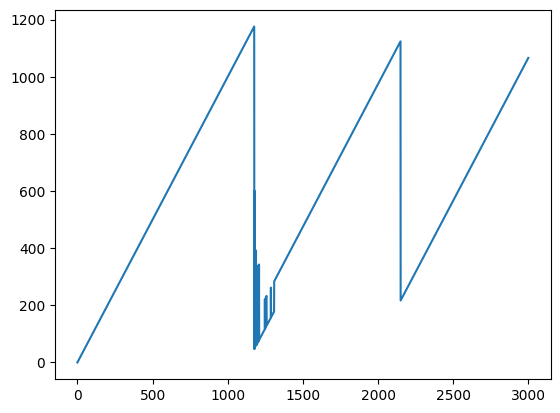

In [217]:
beta = 2*log(len(X))
locs = pelt(X,normal_mean,beta)
plt.plot(locs)
changepoints(locs)

In [213]:
changepoints(locs)

[1024, 1932]

In [162]:
def blob(x,f,g = None) :
    return f(g(x))

In [160]:
from math import sin,cos
blob(1,sqrt,cos)

0.7350525871447157

In [201]:
list(range(10))[0]

0